
# Customer Segmentation with RFM


# Business Problem

**FLO wants to segment its customers and develop marketing strategies based on these segments. To achieve this, customer behaviors will be defined, and groups will be created based on these behavioral clusters.**

# Dataset Story

**The dataset consists of information obtained from the past shopping behaviors of customers who made their last purchases between 2020 and 2021 through OmniChannel (both online and offline shopping).**

| **Column Name**                         | **Description**                                                  |
|-----------------------------------------|------------------------------------------------------------------|
| `master_id`                             | Unique customer number                                          |
| `order_channel`                         | Channel used for shopping (Android, iOS, Desktop, Mobile, Offline) |
| `last_order_channel`                    | Channel used for the most recent purchase                        |
| `first_order_date`                      | Date of the customer's first purchase                            |
| `last_order_date`                       | Date of the customer's most recent purchase                      |
| `last_order_date_online`                | Date of the customer's most recent online purchase               |
| `last_order_date_offline`               | Date of the customer's most recent offline purchase              |
| `order_num_total_ever_online`           | Total number of purchases made by the customer online            |
| `order_num_total_ever_offline`          | Total number of purchases made by the customer offline           |
| `customer_value_total_ever_offline`     | Total amount spent by the customer on offline purchases          |
| `customer_value_total_ever_online`      | Total amount spent by the customer on online purchases           |
| `interested_in_categories_12`           | List of categories the customer has shopped in the last 12 months |

# Data Understanding

In [86]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width',1000)

In [3]:
df_ = pd.read_csv("/Users/mustafaemircan/PycharmProjects/MiuulBootcamp/PROJECTS/CRM PROJECTS/RFM PROJECTS/flo_data_20k.csv")

In [4]:
df = df_.copy()

In [5]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR]


In [90]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

In [91]:
check_df(df)

##################### Shape #####################
(19945, 14)
##################### Types #####################
master_id                                    object
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                 float64
order_num_total_ever_offline                float64
customer_value_total_ever_offline           float64
customer_value_total_ever_online            float64
interested_in_categories_12                  object
order_num_total                             float64
customer_value_total                        float64
dtype: object
##################### NA #####################
master_id                            0
order_channel                        0
last_order_channel   

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.00,3.11,4.23,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.00,1.91,2.06,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.00,253.92,301.53,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.00,497.32,832.60,12.99,149.98,286.46,578.44,45220.13


# Omnichannel refers to customers shopping both online and offline. We have created new variables for each customer’s total number of purchases and total spending.


In [10]:
df["order_num_total"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["customer_value_total"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

In [11]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN],5.00,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.00,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]",5.00,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.00,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR],2.00,209.98


# We examined the variable types. We converted the variables representing dates to the date type.



In [14]:
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

# We examined the distribution of the number of customers across shopping channels, the average number of products purchased, and the average spending.


In [16]:
df.groupby("order_channel").agg({"master_id": "count",
                                 "order_num_total": "mean",
                                 "customer_value_total": "mean"})

,master_id,order_num_total,customer_value_total
order_channel,,,
Android App,9495,5.50,823.49
Desktop,2735,3.99,588.78
Ios App,2833,5.42,891.63
Mobile,4882,4.44,620.28


# We ranked the top 10 customers who generated the highest revenue.

In [21]:
df.sort_values("customer_value_total", ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.00,2.00,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.00,45905.10
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.00,1.00,130.49,36687.80,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.00,36818.29
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.00,1.00,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.00,33918.10
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.00,1.00,538.94,30688.47,"[ERKEK, KADIN, AKTIFSPOR]",11.00,31227.41
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.00,3.00,18119.14,2587.20,[AKTIFSPOR],4.00,20706.34
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.00,4.00,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.00,18443.57
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.00,1.00,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.00,16918.57
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.00,1.00,180.73,12545.37,"[ERKEK, AKTIFSPOR]",37.00,12726.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.00,1.00,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.00,12282.24
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,Desktop,Desktop,2018-11-24,2020-11-11,2020-11-11,2019-12-06,18.00,2.00,64.97,12038.18,"[ERKEK, KADIN]",20.00,12103.15


# We ranked the top 10 customers with the highest number of orders.

In [22]:
df.sort_values("order_num_total", ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.00,2.00,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.00,45905.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.00,1.00,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.00,12282.24
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.00,109.00,10239.46,143.98,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.00,10383.44
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.00,87.00,8432.25,139.98,[ERKEK],88.00,8572.23
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.00,81.00,3997.55,242.81,[ERKEK],83.00,4240.36
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.00,1.00,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.00,33918.10
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.00,74.00,4640.77,543.28,"[KADIN, AKTIFSPOR]",77.00,5184.05
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.00,3.00,292.93,5004.95,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",75.00,5297.88
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.00,1.00,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.00,16918.57
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.00,4.00,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.00,18443.57


# We modularized the data preprocessing steps into functions.

In [24]:
def data_prep(dataframe):
    dataframe["order_num_total"] = dataframe["order_num_total_ever_online"] + dataframe["order_num_total_ever_offline"]
    dataframe["customer_value_total"] = dataframe["customer_value_total_ever_offline"] + dataframe["customer_value_total_ever_online"]
    date_columns = dataframe.columns[dataframe.columns.str.contains("date")]
    dataframe[date_columns] = dataframe[date_columns].apply(pd.to_datetime)
    return df

In [25]:
df = df_.copy()

In [26]:
data_prep(df)
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN],5.00,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.00,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]",5.00,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.00,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR],2.00,209.98


# Calculating RFM Metrics

- The goal is to calculate three metrics for each customer:
  - **Recency**: The difference between the analysis date and the date of the most recent purchase.
  - **Frequency**: The total number of purchases made by the customer.
  - **Monetary**: The total amount of money spent by the customer.


In [27]:
df["last_order_date"].max()

Timestamp('2021-05-30 00:00:00')

In [37]:
analysis_date = dt.datetime(2021,6,1)
analysis_date

datetime.datetime(2021, 6, 1, 0, 0)

In [45]:
rfm = pd.DataFrame()
rfm["customer_id"] = df["master_id"]
rfm["recency"] = (analysis_date - df["last_order_date"]).dt.days 
rfm["frequency"] = df["order_num_total"]
rfm["monetary"] = df["customer_value_total"]

rfm.head()

,customer_id,recency,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.00,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.00,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.00,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.00,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.00,209.98


In [46]:
rfm.sort_values("recency").head()

,customer_id,recency,frequency,monetary
12438,625f40a2-5bd2-11ea-98b0-000d3a38a36f,2,16.00,9953.31
19111,3991df04-d707-11e9-93bc-000d3a38a36f,2,3.00,639.96
10737,7a1e133e-a4b3-11e9-a2fc-000d3a38a36f,2,6.00,523.92
6424,927a71c4-a8b5-11e9-a2fc-000d3a38a36f,2,13.00,2104.56
16618,35bb1806-c133-11eb-8ef5-000d3a38a36f,2,2.00,1339.95


In [52]:
df[df["master_id"] == "625f40a2-5bd2-11ea-98b0-000d3a38a36f"]

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
12438,625f40a2-5bd2-11ea-98b0-000d3a38a36f,Android App,Android App,2019-12-27,2021-05-30,2021-05-30,2019-12-27,15.00,1.00,229.98,9723.33,"[AKTIFCOCUK, KADIN, AKTIFSPOR]",16.00,9953.31


In [53]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,19945.00,134.46,103.28,2.00,43.00,111.00,202.00,367.00
frequency,19945.00,5.02,4.74,2.00,3.00,4.00,6.00,202.00
monetary,19945.00,751.24,895.40,44.98,339.98,545.27,897.78,45905.10


# **Calculation of RF and RFM Scores**


In [54]:
rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels=[5,4,3,2,1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels=[1,2,3,4,5])

In [55]:
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.00,939.37,3,4,4
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.00,2013.55,3,5,5
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.00,585.32,2,4,3
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.00,121.97,3,1,1
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.00,209.98,3,1,1


In [57]:
rfm["RF_Score"] = (rfm["recency_score"].astype(str) +
                    rfm["frequency_score"].astype(str))

In [58]:
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str))

In [59]:
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_Score,RFM_SCORE
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.00,939.37,3,4,4,34,344
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.00,2013.55,3,5,5,35,355
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.00,585.32,2,4,3,24,243
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.00,121.97,3,1,1,31,311
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.00,209.98,3,1,1,31,311


# **Defining RF Scores as Segments**


In [60]:
# segment map
# RFM isimlendirmesi
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [61]:
rfm["segment"] = rfm["RF_Score"].replace(seg_map, regex=True)
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_Score,RFM_SCORE,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.00,939.37,3,4,4,34,344,loyal_customers
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.00,2013.55,3,5,5,35,355,loyal_customers
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.00,585.32,2,4,3,24,243,at_Risk
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.00,121.97,3,1,1,31,311,about_to_sleep
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.00,209.98,3,1,1,31,311,about_to_sleep


# We examined the averages of recency, frequency, and monetary metrics for each segment.


In [64]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency       monetary      
                       mean count      mean count     mean count
segment                                                         
about_to_sleep       113.79  1629      2.40  1629   359.01  1629
at_Risk              241.61  3131      4.47  3131   646.61  3131
cant_loose           235.44  1200     10.70  1200  1474.47  1200
champions             17.11  1932      8.93  1932  1406.63  1932
hibernating          247.95  3604      2.39  3604   366.27  3604
loyal_customers       82.59  3361      8.37  3361  1216.82  3361
need_attention       113.83   823      3.73   823   562.14   823
new_customers         17.92   680      2.00   680   339.96   680
potential_loyalists   37.16  2938      3.30  2938   533.18  2938
promising             58.92   647      2.00   647   335.67   647

In [66]:
rfm[rfm["segment"] == "cant_loose"].index

Index([   15,    41,    76,    91,   147,   187,   197,   291,   308,   314,
       ...
       19776, 19782, 19784, 19849, 19863, 19868, 19888, 19932, 19933, 19936], dtype='int64', length=1200)

# TASKS

# Using RFM analysis, we identified customers fitting specific profiles for two cases and saved their customer IDs in a CSV file.

a. FLO is introducing a new women's shoe brand with prices above general customer preferences. Therefore, they want to specifically target customers who are loyal and have shopped in the women’s category. The IDs of these customers were saved in a CSV file named `new_brand_target_customer_ids.csv`.

In [67]:
df["interested_in_categories_12"].value_counts()

interested_in_categories_12
[AKTIFSPOR]                                     3464
[KADIN]                                         2158
[]                                              2135
[ERKEK]                                         1973
[KADIN, AKTIFSPOR]                              1352
[ERKEK, AKTIFSPOR]                              1178
[ERKEK, KADIN]                                   848
[COCUK]                                          836
[ERKEK, KADIN, AKTIFSPOR]                        775
[AKTIFCOCUK]                                     679
[COCUK, KADIN]                                   443
[AKTIFCOCUK, COCUK]                              349
[AKTIFCOCUK, AKTIFSPOR]                          317
[COCUK, AKTIFSPOR]                               317
[COCUK, KADIN, AKTIFSPOR]                        241
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]     223
[ERKEK, COCUK]                                   215
[ERKEK, COCUK, KADIN, AKTIFSPOR]                 213
[AKTIFCOCUK, COCUK

In [68]:
target_segments_customer_ids = rfm[rfm["segment"].isin(["champions", "loyal_customers"])]["customer_id"]
cust_ids = df[(df["master_id"].isin(target_segments_customer_ids)) & (df["interested_in_categories_12"].str.contains("KADIN"))]["master_id"]
# cust_ids.to_csv("yeni_marka_hedef_müşteri_id.csv", index=False)

In [69]:
cust_ids.shape

(2497,)

In [72]:
rfm_new = pd.DataFrame()
rfm_new["KADIN_hedef_kitle"] = cust_ids

In [73]:
rfm_new.head()

,KADIN_hedef_kitle
0,cc294636-19f0-11eb-8d74-000d3a38a36f
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f
11,c2e15af2-9eed-11e9-9897-000d3a38a36f
33,fb840306-1219-11ea-a001-000d3a38a36f


b. A discount of around 40% is planned for men's and children's products. To target this discount, the aim is to reach past good customers who haven't shopped recently and new customers interested in these categories. The IDs of these suitable customers were saved in a CSV file named `discount_target_customer_ids.csv`.

In [74]:
target_segments_customer_ids_2 = rfm[rfm["segment"].isin(["cant_loose", "at_risk", "new_customers"])]["customer_id"]
cust_ids = df[(df["master_id"].isin(target_segments_customer_ids)) & ((df["interested_in_categories_12"].str.contains("ERKEK"))|(df["interested_in_categories_12"].str.contains("COCUK")))]["master_id"]
#cust_ids.to_csv(("yeni_marka_hedef_müşteri_2.csv", index=False))

In [75]:
rfm_new["ERKEK-COCUK_hedef_kitle"] = cust_ids

In [79]:
rfm_new.head()

,KADIN_hedef_kitle,ERKEK-COCUK_hedef_kitle
0,cc294636-19f0-11eb-8d74-000d3a38a36f,NaN
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,cfbda69e-5b4f-11ea-aca7-000d3a38a36f
11,c2e15af2-9eed-11e9-9897-000d3a38a36f,c2e15af2-9eed-11e9-9897-000d3a38a36f
33,fb840306-1219-11ea-a001-000d3a38a36f,fb840306-1219-11ea-a001-000d3a38a36f


# BONUS
**Consolidating All Operations into a Single Function**

In [82]:
def create_rfm(dataframe):
    # Veriyi Hazırlma
    dataframe["order_num_total"] = dataframe["order_num_total_ever_online"] + dataframe["order_num_total_ever_offline"]
    dataframe["customer_value_total"] = dataframe["customer_value_total_ever_offline"] + dataframe["customer_value_total_ever_online"]
    date_columns = dataframe.columns[dataframe.columns.str.contains("date")]
    dataframe[date_columns] = dataframe[date_columns].apply(pd.to_datetime)


    # RFM METRIKLERININ HESAPLANMASI
    dataframe["last_order_date"].max()  # 2021-05-30
    analysis_date = dt.datetime(2021, 6, 1)
    rfm = pd.DataFrame()
    rfm["customer_id"] = dataframe["master_id"]
    rfm["recency"] = (analysis_date - dataframe["last_order_date"]).dt.days
    rfm["frequency"] = dataframe["order_num_total"]
    rfm["monetary"] = dataframe["customer_value_total"]

    # RF ve RFM SKORLARININ HESAPLANMASI
    rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
    rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
    rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])
    rfm["RF_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))
    rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str))


    # SEGMENTLERIN ISIMLENDIRILMESI
    seg_map = {
        r'[1-2][1-2]': 'hibernating',
        r'[1-2][3-4]': 'at_Risk',
        r'[1-2]5': 'cant_loose',
        r'3[1-2]': 'about_to_sleep',
        r'33': 'need_attention',
        r'[3-4][4-5]': 'loyal_customers',
        r'41': 'promising',
        r'51': 'new_customers',
        r'[4-5][2-3]': 'potential_loyalists',
        r'5[4-5]': 'champions'
    }
    rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

    return rfm[["customer_id", "recency","frequency","monetary","RF_SCORE","RFM_SCORE","segment"]]

In [83]:
func_rfm = create_rfm(df)

In [84]:
func_rfm.head()

,customer_id,recency,frequency,monetary,RF_SCORE,RFM_SCORE,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.00,939.37,34,344,loyal_customers
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.00,2013.55,35,355,loyal_customers
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.00,585.32,24,243,at_Risk
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.00,121.97,31,311,about_to_sleep
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.00,209.98,31,311,about_to_sleep


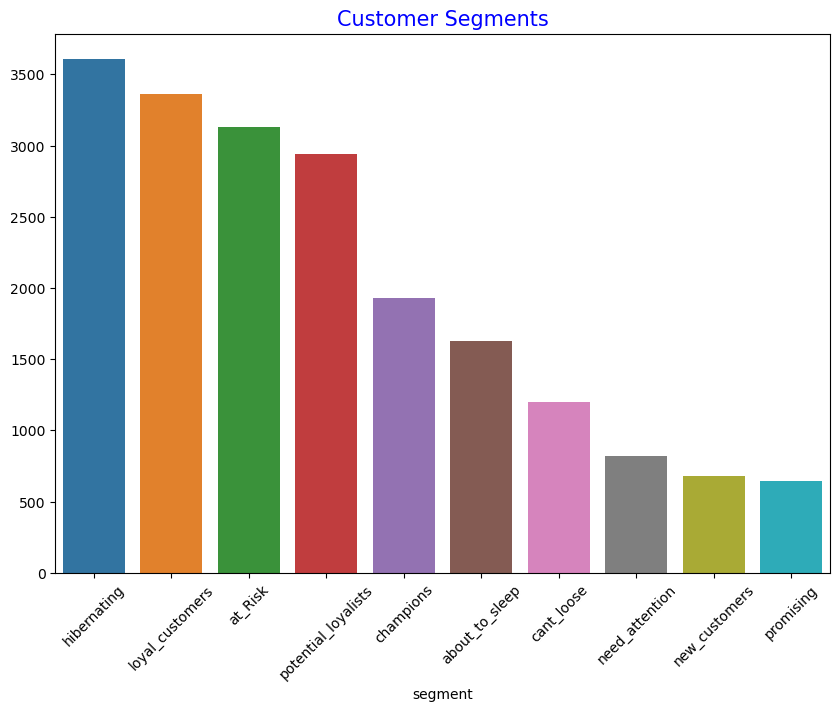

In [87]:
sgm= rfm["segment"].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=sgm.index,y=sgm.values)
plt.xticks(rotation=45)
plt.title('Customer Segments',color = 'blue',fontsize=15)
plt.show()

# THANKS.